<a href="https://colab.research.google.com/github/aadarsh73/gfit-data-visualization/blob/main/google_fit_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries

In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading CSV

In [218]:
# The csv contains data from 24/03/22 to 25/02/23
data = pd.read_csv('data.csv')

In [219]:
data.head()

,Date,Move Minutes count,Calories (kcal),Distance (m),Heart Points,Heart Minutes,Low latitude (deg),Low longitude (deg),High latitude (deg),High longitude (deg),Average speed (m/s),Max speed (m/s),Min speed (m/s),Step count,Biking duration (ms),Walking duration (ms),Running duration (ms)
0,2022-03-24,111,443.351522,4847.024008,25.0,19.0,NaN,NaN,NaN,NaN,0.745803,3.327988,0.261519,7406,NaN,5752701,NaN
1,2022-03-25,109,489.435068,4592.751823,12.0,11.0,NaN,NaN,NaN,NaN,0.515379,3.909080,0.282441,7146,NaN,6351718,NaN
2,2022-03-26,94,332.544844,4020.335186,3.0,3.0,NaN,NaN,NaN,NaN,0.516137,2.747045,0.251058,6546,NaN,4315651,NaN
3,2022-03-27,148,488.710682,6170.792459,12.0,11.0,NaN,NaN,NaN,NaN,0.573849,2.569710,0.251058,9932,NaN,5873677,NaN
4,2022-03-28,112,382.479141,5665.397885,30.0,24.0,NaN,NaN,NaN,NaN,0.763956,4.047949,0.251058,8624,NaN,4963682,NaN


### Checking for null values

In [220]:
data.isna().sum()

Date                       0
Move Minutes count         0
Calories (kcal)            0
Distance (m)               0
Heart Points               9
Heart Minutes              9
Low latitude (deg)        40
Low longitude (deg)       40
High latitude (deg)       40
High longitude (deg)      40
Average speed (m/s)        0
Max speed (m/s)            0
Min speed (m/s)            0
Step count                 0
Biking duration (ms)     278
Walking duration (ms)      0
Running duration (ms)    285
dtype: int64

### Replacing null values with median of column

In [221]:
columns = ['Move Minutes count', 'Calories (kcal)', 'Distance (m)',
       'Heart Points', 'Heart Minutes', 'Low latitude (deg)',
       'Low longitude (deg)', 'High latitude (deg)', 'High longitude (deg)',
       'Average speed (m/s)', 'Max speed (m/s)', 'Min speed (m/s)',
       'Step count', 'Biking duration (ms)', 'Walking duration (ms)',
       'Running duration (ms)']
for col in columns:
    data[col].fillna(data[col].median(), inplace=True)

### Converting date column to datetime

In [222]:
data['Date'] = pd.to_datetime(data['Date'])

### Line plot for all columns

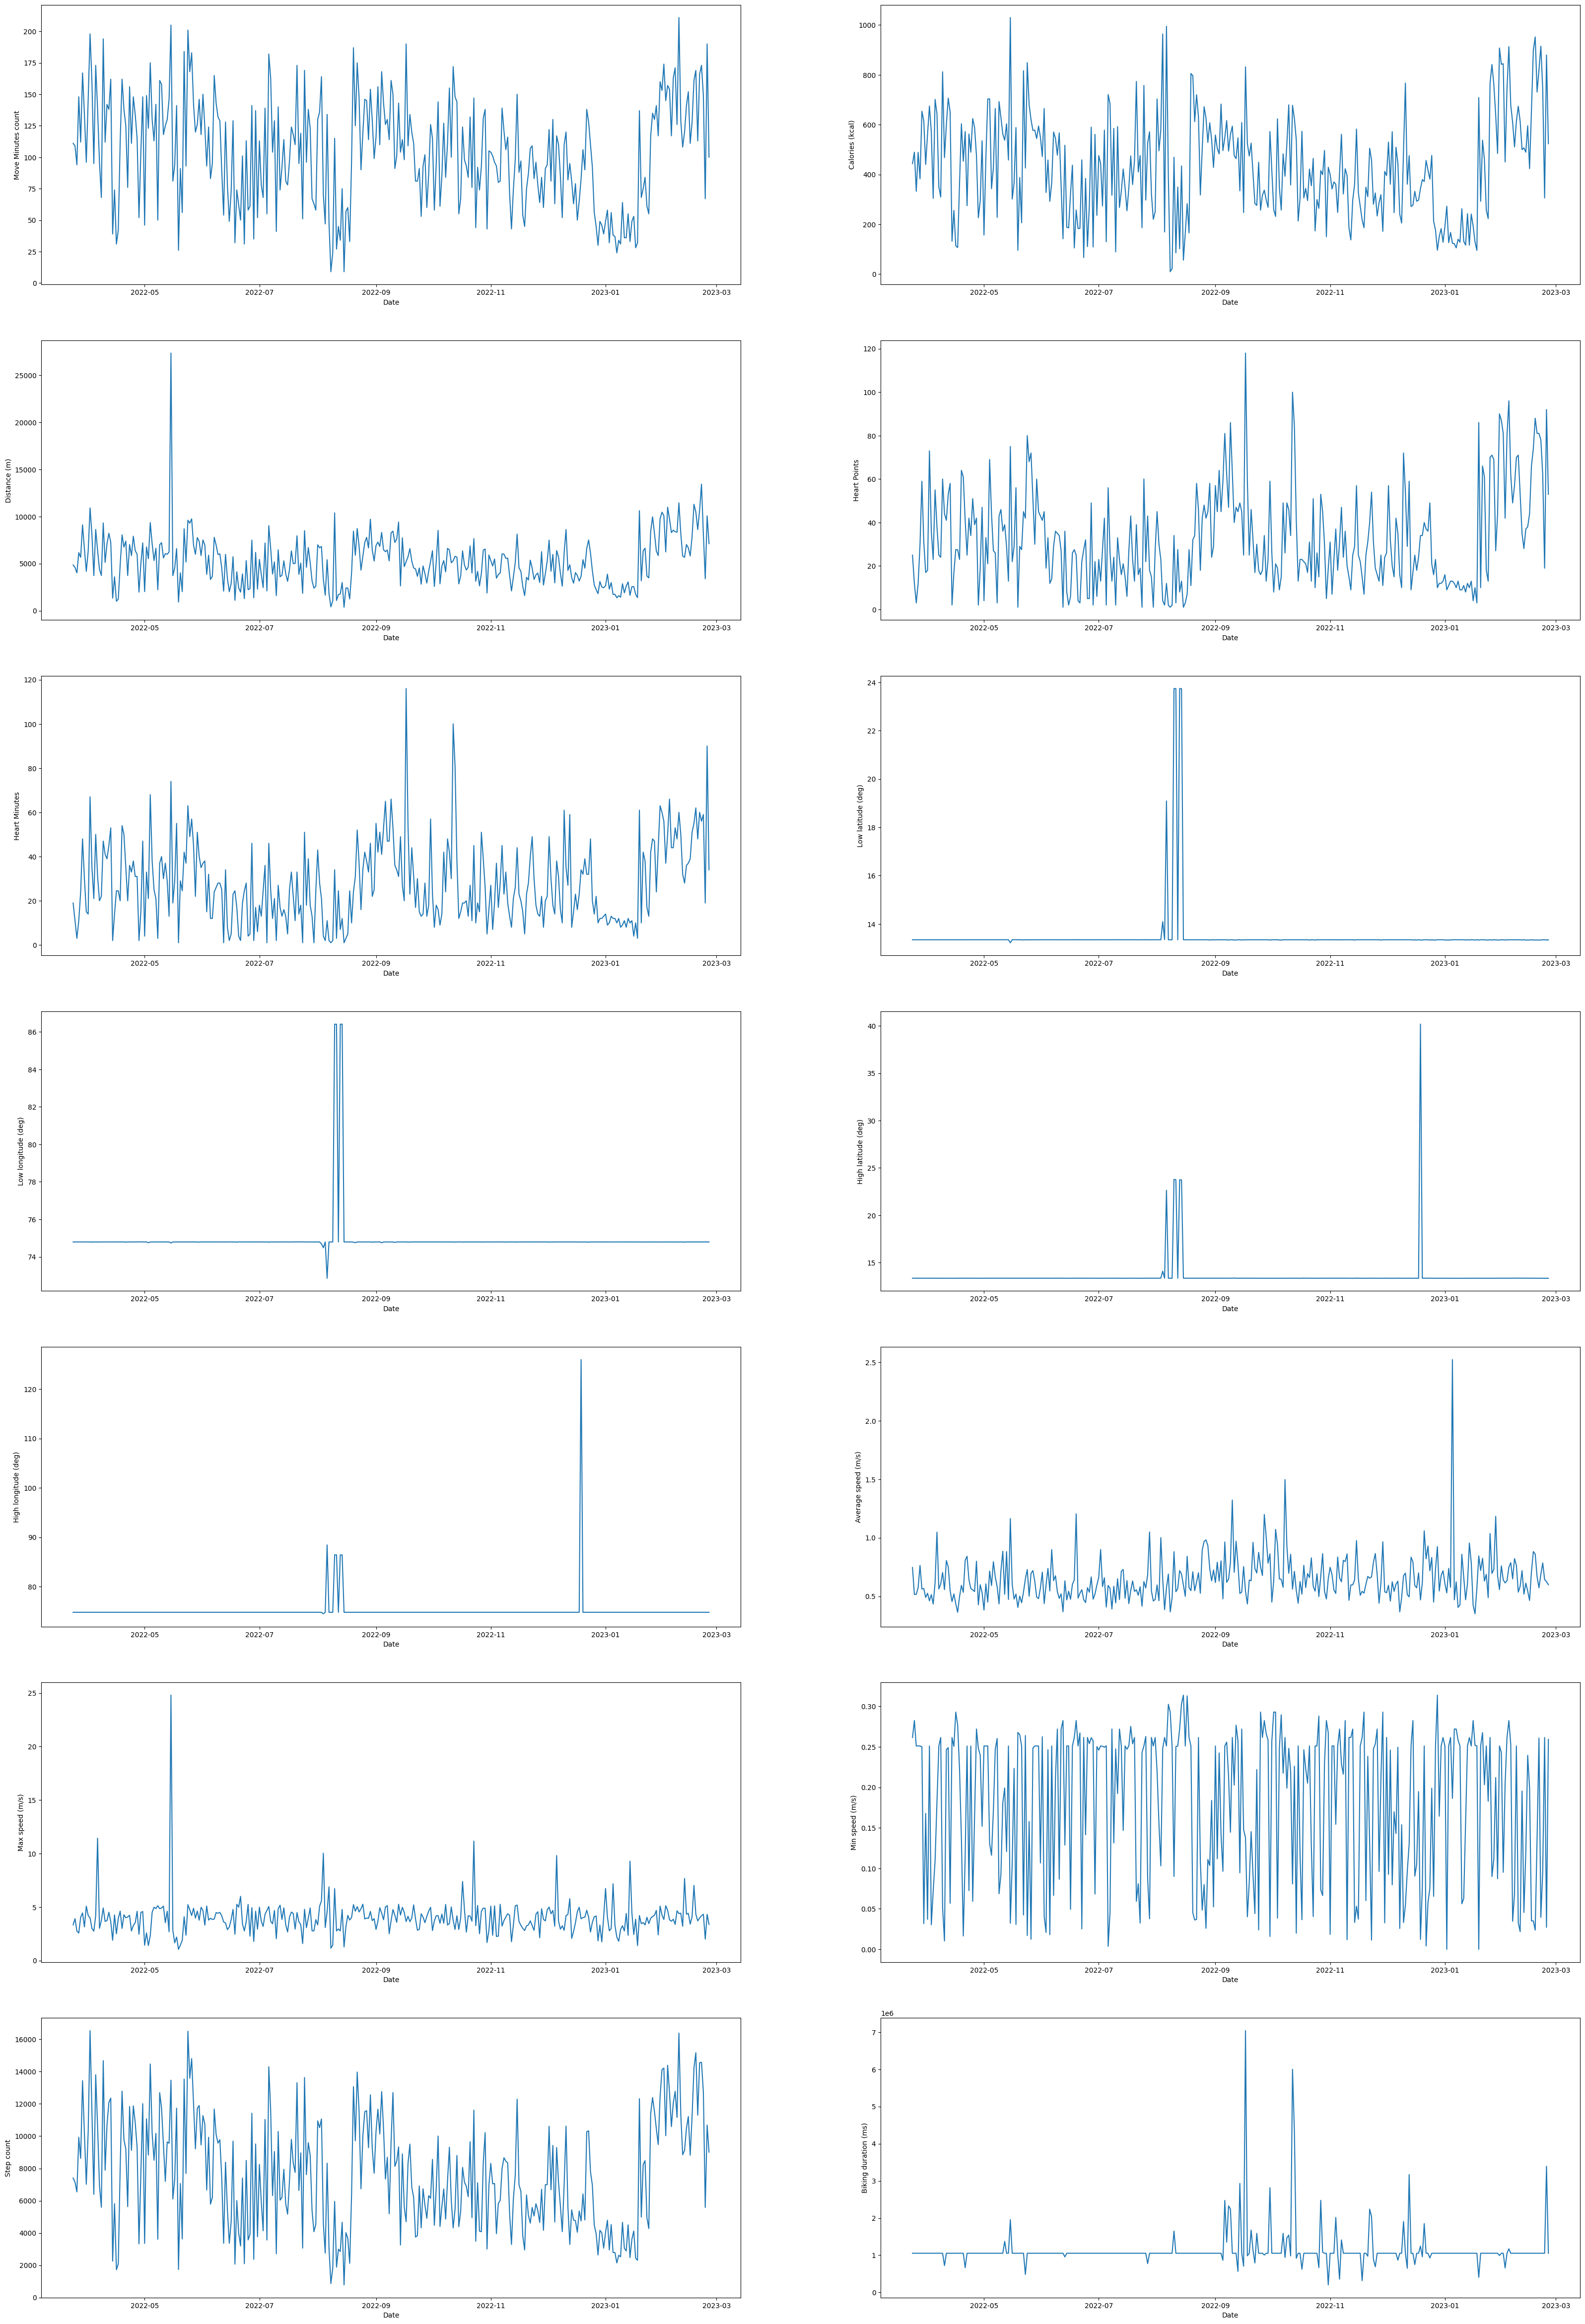

In [223]:
fig,axs=plt.subplots(7,2,figsize=(40,60))
j=1
a=data.columns
for z in range(0,7,1):
        for y in range(0,2,1):
            sns.lineplot(x=data['Date'],y=data[a[j]],ax=axs[z][y])
            j=j+1

### Dropping irrelevant columns

In [224]:
data = data.drop(['Low latitude (deg)', 'Low longitude (deg)', 'High latitude (deg)', 'High longitude (deg)' ], axis=1)

### Move duration per day

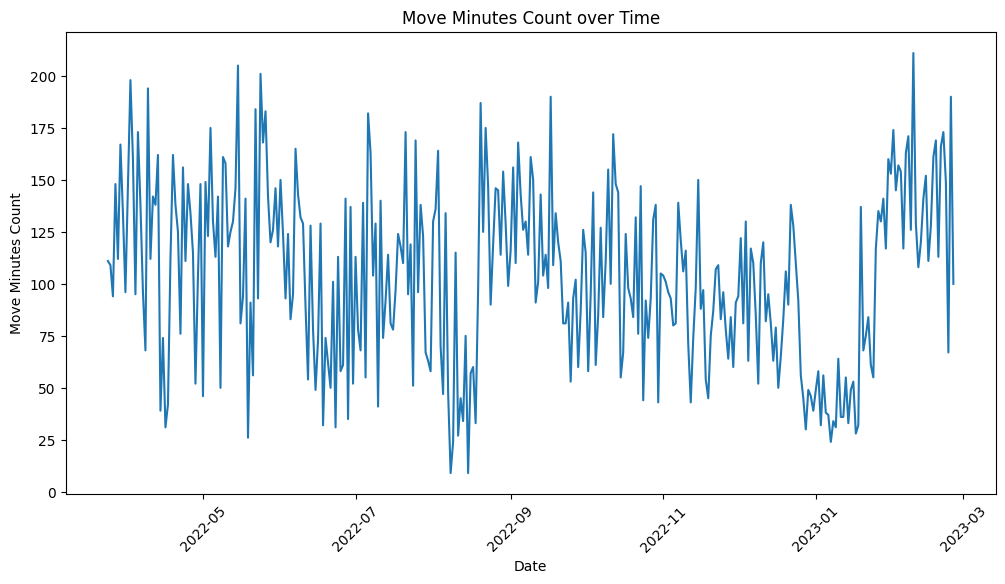

In [225]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='Move Minutes count')
plt.title('Move Minutes Count over Time')
plt.xlabel('Date')
plt.ylabel('Move Minutes Count')
plt.xticks(rotation=45)
plt.show()

### Distance travelled per day

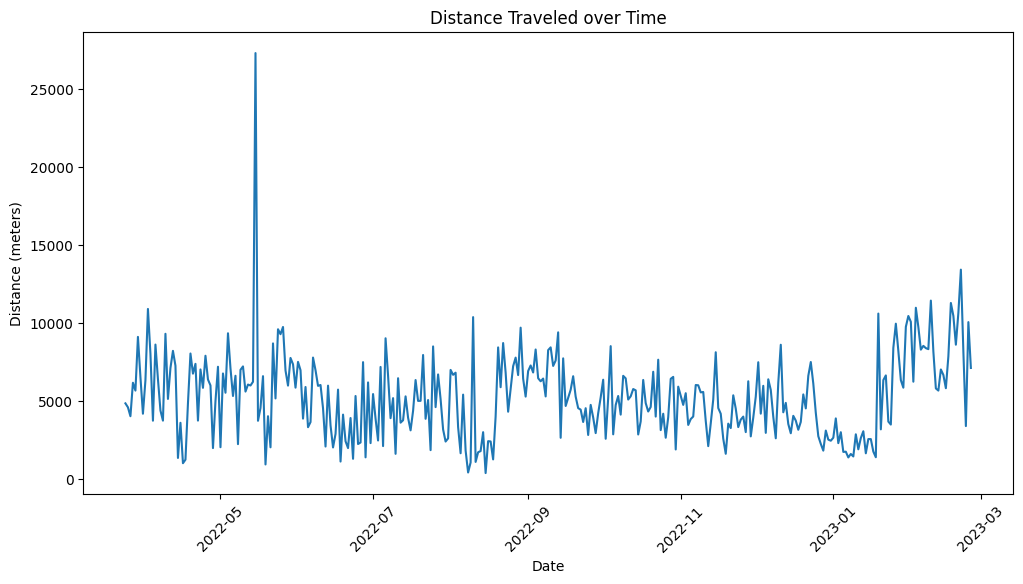

In [226]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='Distance (m)')
plt.title('Distance Traveled over Time')
plt.xlabel('Date')
plt.ylabel('Distance (meters)')
plt.xticks(rotation=45)
plt.show()

### Calories burned per day

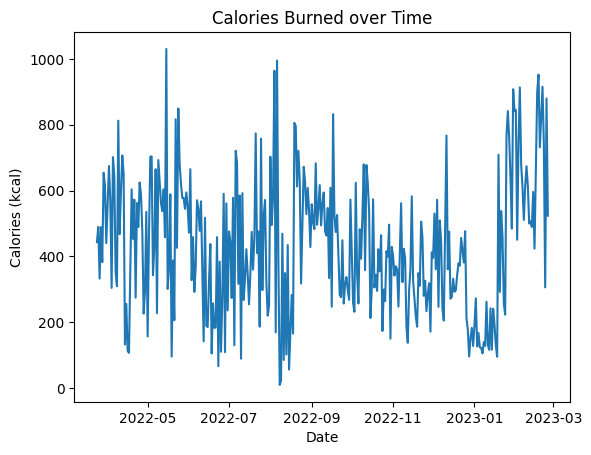

In [227]:
plt.plot(data['Date'], data['Calories (kcal)'])
plt.xlabel('Date')
plt.ylabel('Calories (kcal)')
plt.title('Calories Burned over Time')
plt.show()

### Total calories burned per day of the week

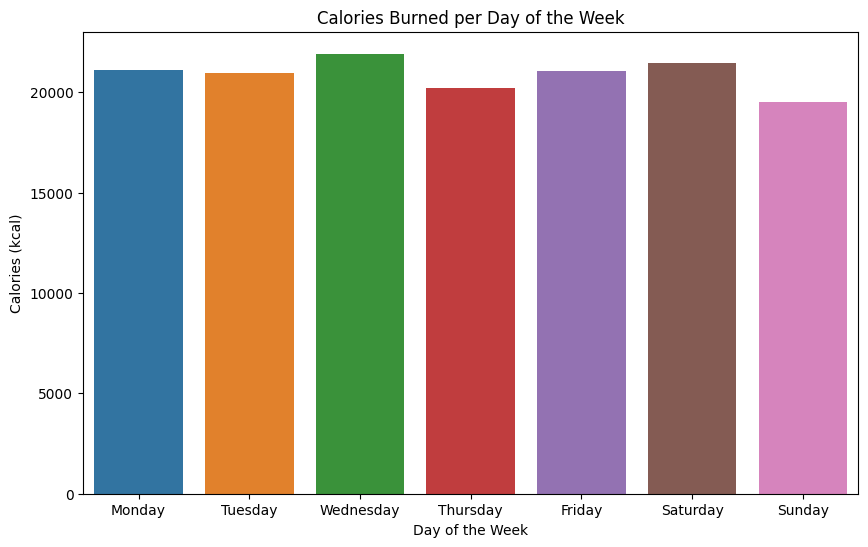

In [228]:
data['Day of Week'] = data['Date'].dt.day_name()
calories_data = data.groupby('Day of Week')['Calories (kcal)'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=calories_data, x='Day of Week', y='Calories (kcal)', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Calories Burned per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Calories (kcal)')
plt.show()

### Scatterplot for Heart Points and Move Duration

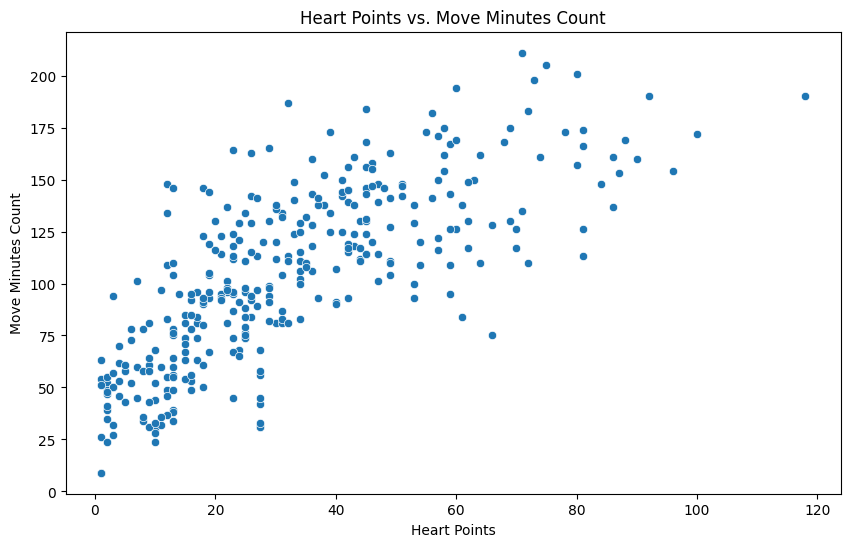

In [229]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Heart Points', y='Move Minutes count')
plt.title('Heart Points vs. Move Minutes Count')
plt.xlabel('Heart Points')
plt.ylabel('Move Minutes Count')
plt.show()

### Correlation between each column

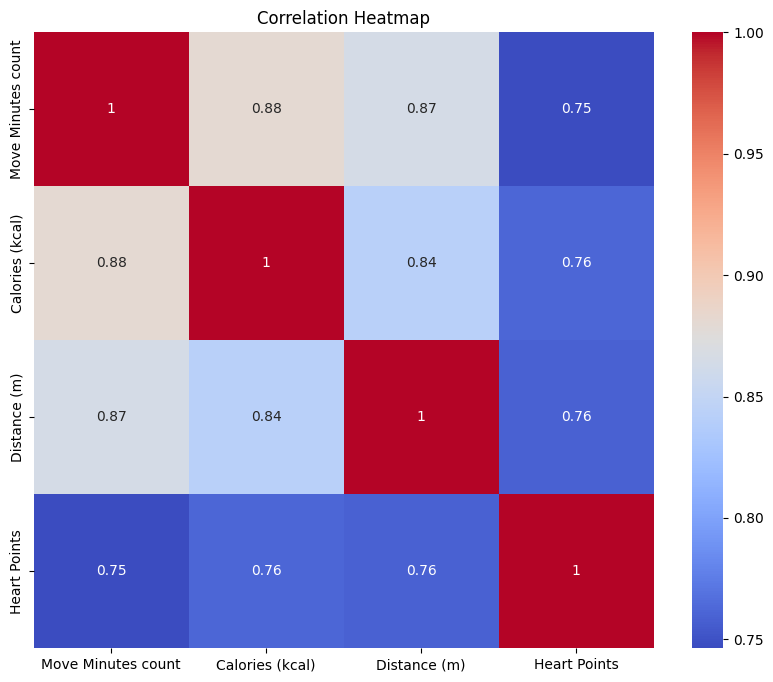

In [230]:
numeric_features = ['Move Minutes count', 'Calories (kcal)', 'Distance (m)', 'Heart Points']
numeric_data = data[numeric_features]
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Count of running done within a particular duration

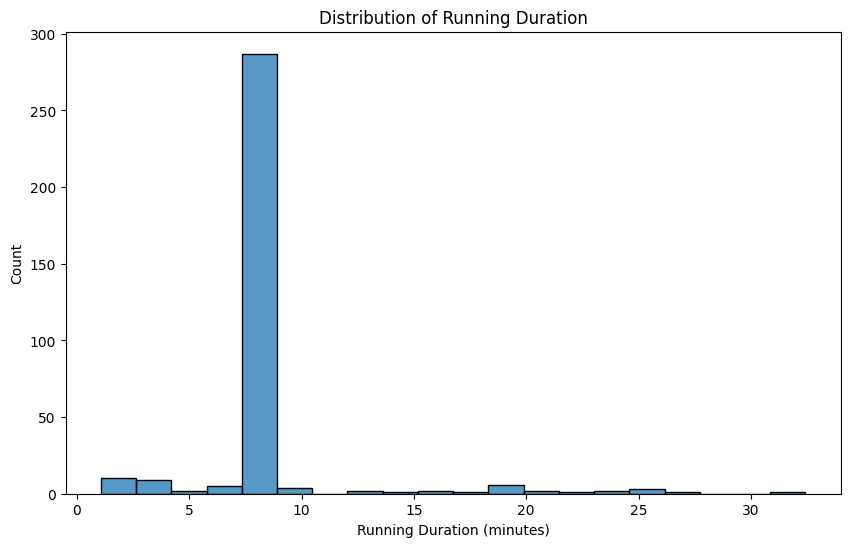

In [231]:
# Convert Running duration from milliseconds to seconds
data['Running duration (min)'] = data['Running duration (ms)'] / 60000

# Example 6: Histogram of Running duration in seconds
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Running duration (min)', bins=20)
plt.title('Distribution of Running Duration')
plt.xlabel('Running Duration (minutes)')
plt.ylabel('Count')
plt.show()

### Scatterplot for Distance and Heart Points

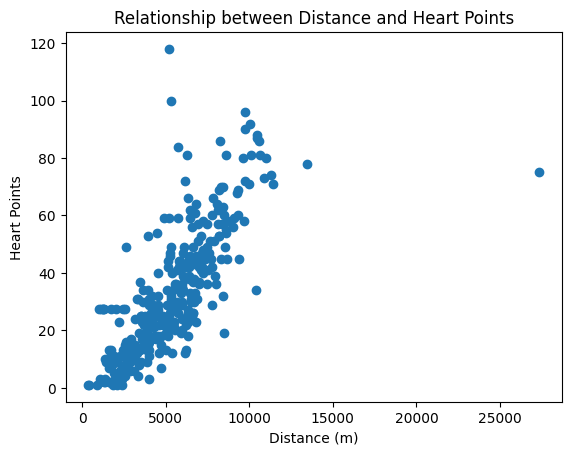

In [232]:
plt.scatter(data['Distance (m)'], data['Heart Points'])
plt.xlabel('Distance (m)')
plt.ylabel('Heart Points')
plt.title('Relationship between Distance and Heart Points')
plt.show()

### Finding the unusual distance covered and the normal range of distance travelled

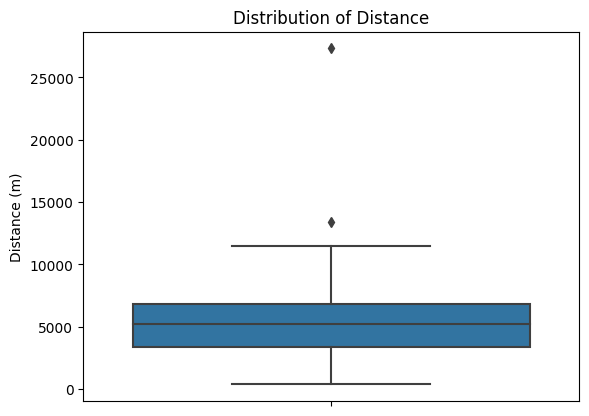

In [233]:
sns.boxplot(y='Distance (m)', data=data)
plt.ylabel('Distance (m)')
plt.title('Distribution of Distance')
plt.show()

### Finding the unusual amount of calories burnt and the normal range

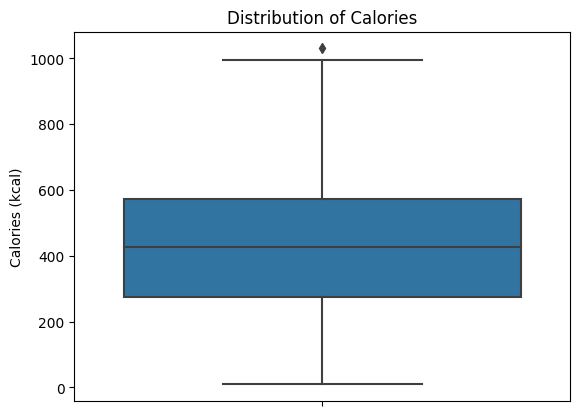

In [234]:
sns.boxplot(y='Calories (kcal)', data=data)
plt.ylabel('Calories (kcal)')
plt.title('Distribution of Calories')
plt.show()

### Cumulative Calories Burned over time

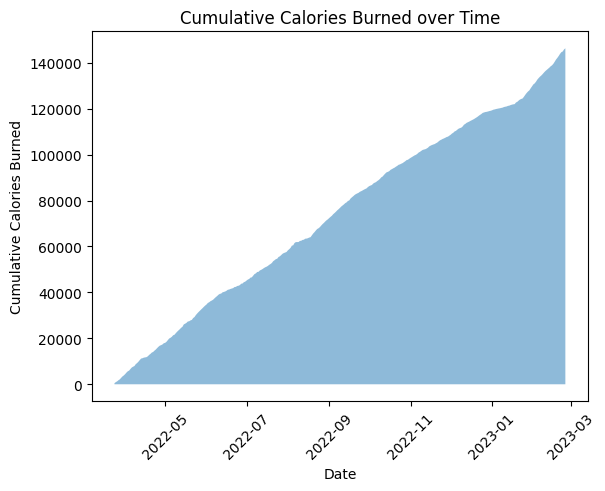

In [235]:

data_sorted = data.sort_values('Date')

cumulative_calories = data_sorted['Calories (kcal)'].cumsum()

plt.fill_between(data_sorted['Date'], cumulative_calories, alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Cumulative Calories Burned')
plt.title('Cumulative Calories Burned over Time')
plt.xticks(rotation=45)
plt.show()

### Cumulative Distance travelled over time ( in kms )

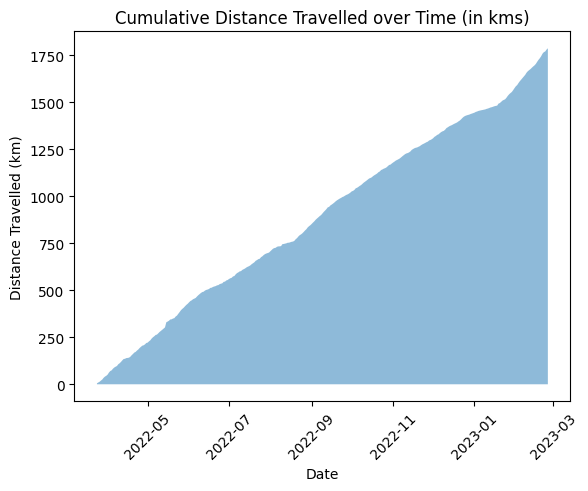

In [243]:
data_sorted = data.sort_values('Date')
data_sorted['Distance (km)'] = data_sorted['Distance (m)']/1000
cumulative_calories = data_sorted['Distance (km)'].cumsum()

plt.fill_between(data_sorted['Date'], cumulative_calories, alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Distance Travelled (km)')
plt.title('Cumulative Distance Travelled over Time (in kms)')
plt.xticks(rotation=45)
plt.show()

### Cumulative Walking Duration (in hours)

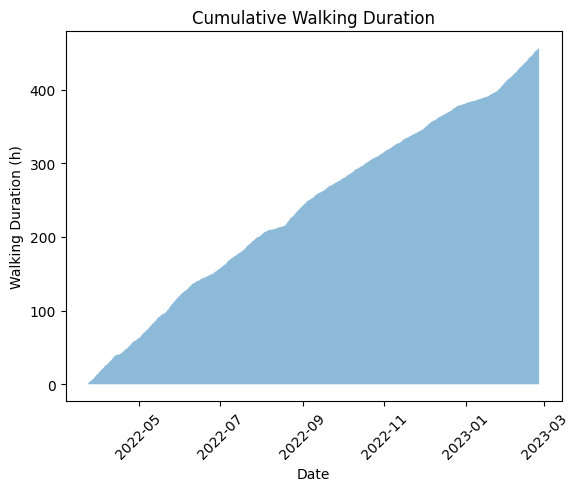

In [248]:
data_sorted = data.sort_values('Date')
data_sorted['Walking Duration (h)'] = data_sorted['Walking duration (ms)']/1000/60/60
cumulative_calories = data_sorted['Walking Duration (h)'].cumsum()

plt.fill_between(data_sorted['Date'], cumulative_calories, alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Walking Duration (h)')
plt.title('Cumulative Walking Duration')
plt.xticks(rotation=45)
plt.show()

### Calories Burned per day of the week along with range and density

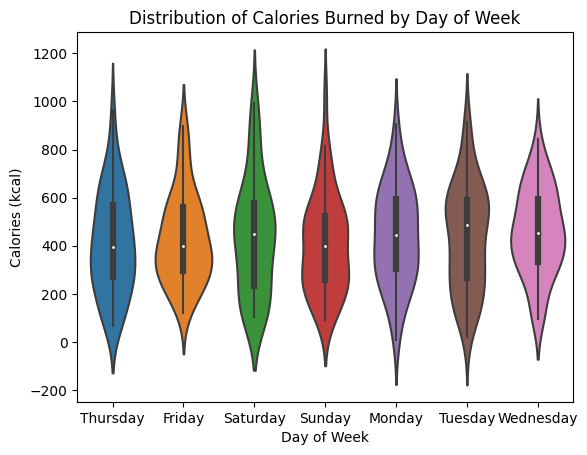

In [236]:
sns.violinplot(x='Day of Week', y='Calories (kcal)', data=data)
plt.xlabel('Day of Week')
plt.ylabel('Calories (kcal)')
plt.title('Distribution of Calories Burned by Day of Week')
plt.show()

### Distance Travelled per day of the week along with range and density

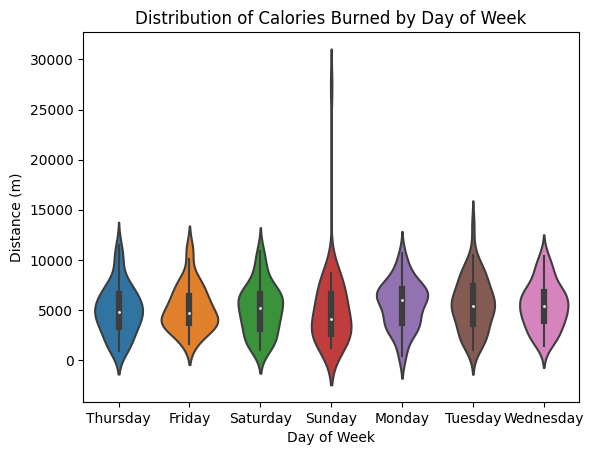

In [251]:
sns.violinplot(x='Day of Week', y='Distance (m)', data=data)
plt.xlabel('Day of Week')
plt.ylabel('Distance (m)')
plt.title('Distribution of Calories Burned by Day of Week')
plt.show()

### Pairplot for Calories, Distance, Heart Points and Step count

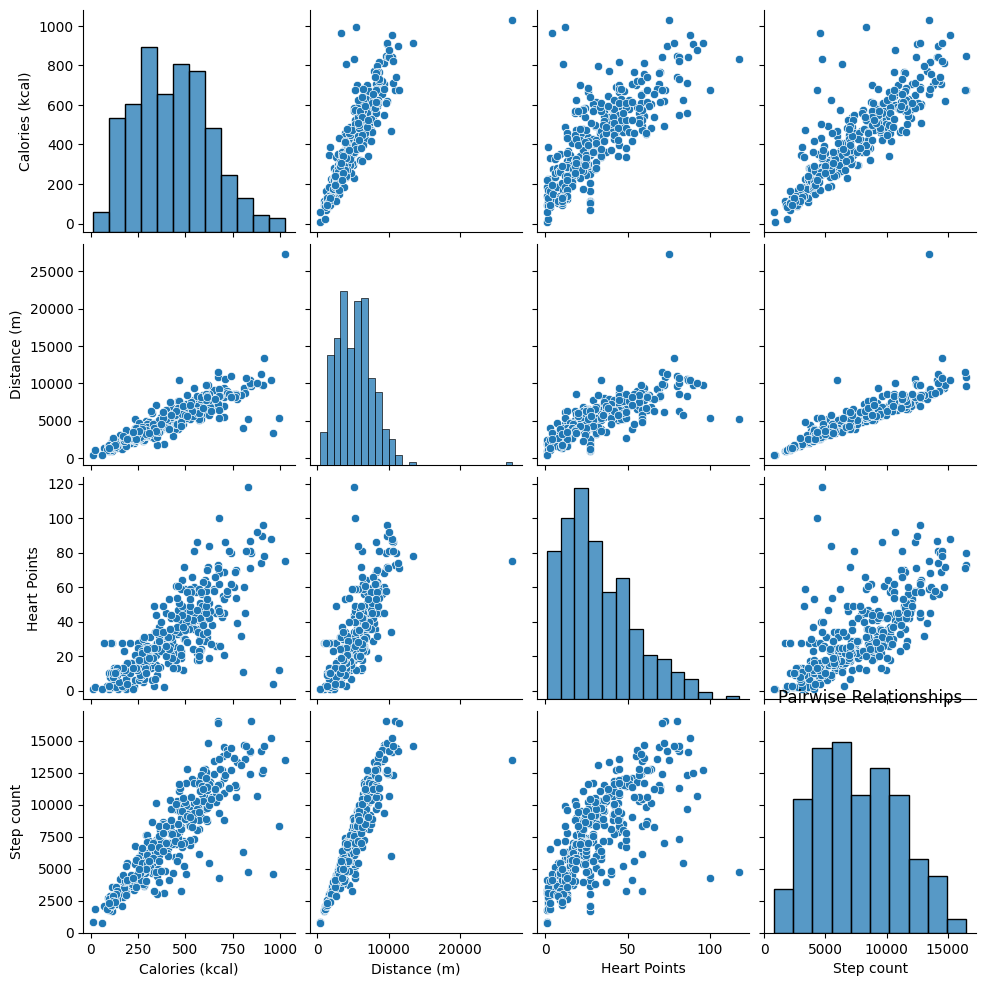

In [237]:
sns.pairplot(data[['Calories (kcal)', 'Distance (m)', 'Heart Points', 'Step count']])
plt.title('Pairwise Relationships')
plt.show()